In [62]:
import numpy as np
import operator
def creatDataSet():
    group = [[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]
    labels = ['A','A','B','B']
    return group,labels
group,labels = creatDataSet()
labels

['A', 'A', 'B', 'B']

In [63]:
a = 'bcaaaad'
print ('a is' +  ' ' + a)

a is bcaaaad


In [64]:
group = [[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]
label1 = ['A','A','B','B']
#定义函数，通过函数classify给新样本电影分类，X为新样本坐标，dataSet为老样本坐标，label为老样本对应的类别，k为取k个离X最近的类别情况
def classify(X,dataSet,label,k):
    dataSetSize = len(dataSet)
    #将新样本与老样本的每一个做差，以便求距离
    diffMat = np.tile(X,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    #做差后求平方和再开根，求出距离。
    distances = sqDistances**0.5
    #按照距离由小到大顺序的索引返回。*重要
    sortedDistances = distances.argsort()
    #取距离最近的k个点的类别，类别为字典的key，数量为val
    classCount = {}
    for i in range(k):
        #从距离X最近的开始，每个样本的类别
        voteLabel = label[sortedDistances[i]]
        #同一类别每多出现一次，在该key后面的val+1，若没出现过的key，第一次出现时val为0+1
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    #sort为list中的函数，sorted()可为可排序的进行排序，sorted(iterable,cmp,key, reverse)，并返回新的list。key后面为定义的一个函数，这里意思为
    #以可迭代对象的第二个域排序，按降序原则排列。默认为False升序。
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount
classify([0,0],group,label1,3)

[('B', 2), ('A', 1)]

In [65]:
a = [1,2,3]
b=operator.itemgetter(1,0)
b(a)

(2, 1)

In [97]:
import pandas as pd
path = "F:/regard_work_as_interest/machine_learning_in_action/machinelearninginaction/Ch02/datingTestSet2.txt"
readFile = pd.read_table(path,sep = '\t',header = None,names = ['a','b','c','d'])
datingDataMat = readFile.iloc[:,:3]
datingLabels = readFile.iloc[:,-1:]
datingDataMat.iloc[:10,1]
c = datingDataMat
c[:10]

,a,b,c
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296
5,72993,10.141740,1.032955
6,35948,6.830792,1.213192
7,42666,13.276369,0.543880
8,67497,8.631577,0.749278
9,35483,12.273169,1.508053


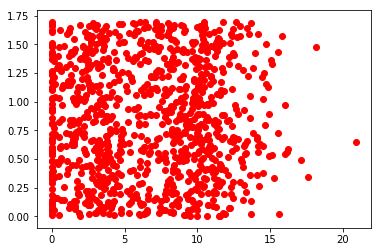

In [94]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat.iloc[:,1],datingDataMat.iloc[:,2],c = 'r')
plt.show()

In [102]:
minVals = datingDataMat.min(axis = 0)
minVals

a    0.000000
b    0.000000
c    0.001156
dtype: float64

In [105]:
maxVals = datingDataMat.max(0)
maxVals

a    91273.000000
b       20.919349
c        1.695517
dtype: float64

In [120]:
ranges = maxVals - minVals
#np.zeros(np.shape(datingDataMat))
m = list(datingDataMat.itertuples(index=False))
df = datingDataMat[['a', 'b', 'c']]
map(tuple,df.values)

In [128]:
from math import log
a = log(7.0,2.0)
a

2.807354922057604

In [159]:
from math import log
#按照给定特征划分数据集
def splitDataSet(dataSet,column,value):
    retDataSet = []
    for x in dataSet:
        if x[column] == value:
            retRow = x
            retDataSet.append(retRow)
    return retDataSet
#计算整个数据集的信息熵
def calcShannonEnt(dataSet):
    labelCounts = {}
    for lc in dataSet:
        #result等于当前行的最后一个值，即该数据下的类别
        result = lc[-1]
        #将类别作为字典的key，出现次数记做对应的value
        labelCounts[result] = labelCounts.get(result,0) + 1
    #为香农熵做初始化的值
    shannonEnt = 0.0
    for key in labelCounts:
        #每种类别的概率
        prob = labelCounts[key]/len(dataSet)
        #计算出最终的熵值
        shannonEnt -= prob*log(prob,2)
    return shannonEnt
def bestFeatureToSplit(dataSet):
    #判定类别的属性的数量
    numFeatures = len(dataSet[0]) - 1
    featList = []
    #总信息熵的值
    baseEntropy = calcShannonEnt(dataSet) 
    bestInfoGain = 0.0;bestFeature = -1
    for i in range(numFeatures):
        #第i种属性下的所有值
        featList = [example[i] for example in dataSet]
        #去重得到第i列下的不相同的所有值
        uniqueValues = set(featList)
        newEntropy = 0.0
        for value in uniqueValues:
            #返回在第i列下特定值value的时候的所有行
            retDataSet = splitDataSet(dataSet,i,value)
            #该分类下的概率
            prob = len(retDataSet)/len(dataSet)
            #不懂不懂不懂为啥×总的熵值
            newEntropy += prob*calcShannonEnt(retDataSet)
        #为取newEntropy的最小值，所以在infoGain更大的时候赋给bestInfoGain
        infoGain = baseEntropy - newEntropy
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            #对应的i为最好的划分数据集的特征
            bestFeature = i
    return bestFeature
data = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
a = bestFeatureToSplit(data)
a


[1, 1, 'yes']

In [134]:
data[0]

[1, 1, 'maybe']

In [137]:
numFeatures = len(data[0]) - 1
for i in range(numFeatures):
    featList = [example[i] for example in data]
    uniqueVals = set(featList)
    print (uniqueVals)

{0, 1}
{0, 1}


In [140]:
#按照给定特征划分数据集
def splitDataSet(dataSet,column,value):
    retDataSet = []
    for x in dataSet:
        if x[column] == value:
            print(x[column])
            retRow = x
            retDataSet.append(retRow)
    return retDataSet
b = splitDataSet(data,0,1)
b

1
1
1


[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no']]

In [161]:
a = 'bbb'
print ('aaa' + ' ' + a)

aaa bbb
